In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [8]:
df = pd.read_csv(r"C:\Users\soumy\OneDrive\AppData\Desktop\data_for_predictions.csv")
df


Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0               0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1               1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2               2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3               3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4               4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...           ...                               ...       ...           ...   
14601       14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602       14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603       14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604       14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605       14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0             0.000000           0.000000                       0.0   
1             0.000000           2.280920                       0.0   
2             0.000000           1.689841                       0.0   
3             0.000000           2.382089                       0.0   
4             2.721811           2.650065                       0.0   
...                ...                ...                       ...   
14601         0.000000           3.667360                       0.0   
14602         2.260071           2.801191                       0.0   
14603         2.255273           2.281919                       0.0   
14604         0.000000           1.308351                       0.0   
14605         0.000000           2.882758                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     0.444045                        0.114481   
1                     1.237292                        0.145711   
2                     1.599009                        0.165794   
3                     1.318689                        0.146694   
4                     2.122969                        0.116900   
...                        ...                             ...   
14601                 1.291591                        0.138305   
14602                 2.161458                        0.100167   
14603                 2.115943                        0.116900   
14604                 0.912753                        0.145711   
14605                 0.315970                        0.167086   

       forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                        0.098142  ...                  2               6   
1                        0.000000  ...                 76               4   
2                        0.087899  ...                 68               8   
3                        0.000000  ...                 69               9   
4                        0.100015  ...                 71               9   
...                           ...  ...                ...             ...   
14601                    0.000000  ...                  7              19   
14602                    0.091892  ...                 40               4   
14603                    0.100015  ...                 46              10   
14604                    0.000000  ...                 40               4   
14605                    0.088454  ...                 72               0   

       channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0                                         0   
1                    1                                         0   
2                    0                                         0   
3                    0                                         0   
4                    1                                         0   
...                ...                                       ...   
14601      

In [9]:
X=df.drop(columns='churn')
y=df['churn']

In [10]:
categorical = [i for i in X.columns if X[i].dtypes == '0']
numerical = [i for i in X.columns if X[i].dtypes != '0']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10224, 63) (4382, 63) (10224,) (4382,)


In [13]:
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

In [14]:
non_numeric_cols = X_train.select_dtypes(exclude=["number"]).columns
print(non_numeric_cols)

Index(['id'], dtype='object')


In [15]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Dropping columns:", list(non_numeric_cols))
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

Dropping columns: ['id']


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [17]:
np_X_train = X_train.values
np_y_train = y_train.values.ravel()
np_X_test = X_test.values
np_y_test = y_test.values.ravel()

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,random_state=0)
rfc.fit(np_X_train, np_y_train)
y_pred = rfc.predict(np_X_test)

In [19]:
print('Moedel accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(np_y_test, y_pred)))

Moedel accuracy score with 10 decision-trees : 0.9110


In [33]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(np_X_train, np_y_train)
y_pred_100 = rfc_100.predict(np_X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9142


In [35]:
feature_names = X_train.columns


In [37]:
feature_importance = pd.DataFrame(rfc_100.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
1   0.049215
6   0.048034
15  0.047777
0   0.047639
4   0.045949
..       ...
30  0.002616
31  0.002560
55  0.002321
5   0.001265
47  0.001028

[62 rows x 1 columns]

In [39]:
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rfc_100.feature_importances_
}).sort_values("Importance", ascending=False)

feature_importance


Feature  Importance
1         1    0.049215
6         6    0.048034
15       15    0.047777
0         0    0.047639
4         4    0.045949
..      ...         ...
30       30    0.002616
31       31    0.002560
55       55    0.002321
5         5    0.001265
47       47    0.001028

[62 rows x 2 columns]

In [41]:
df_info = df.info()
df_columns = df.columns.tolist()

df_info, df_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  14606 non-null  int64  
 1   id                                          14606 non-null  object 
 2   cons_12m                                    14606 non-null  float64
 3   cons_gas_12m                                14606 non-null  float64
 4   cons_last_month                             14606 non-null  float64
 5   forecast_cons_12m                           14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

(None,
 ['Unnamed: 0',
  'id',
  'cons_12m',
  'cons_gas_12m',
  'cons_last_month',
  'forecast_cons_12m',
  'forecast_discount_energy',
  'forecast_meter_rent_12m',
  'forecast_price_energy_off_peak',
  'forecast_price_energy_peak',
  'forecast_price_pow_off_peak',
  'has_gas',
  'imp_cons',
  'margin_gross_pow_ele',
  'margin_net_pow_ele',
  'nb_prod_act',
  'net_margin',
  'pow_max',
  'var_year_price_off_peak_var',
  'var_year_price_peak_var',
  'var_year_price_mid_peak_var',
  'var_year_price_off_peak_fix',
  'var_year_price_peak_fix',
  'var_year_price_mid_peak_fix',
  'var_year_price_off_peak',
  'var_year_price_peak',
  'var_year_price_mid_peak',
  'var_6m_price_off_peak_var',
  'var_6m_price_peak_var',
  'var_6m_price_mid_peak_var',
  'var_6m_price_off_peak_fix',
  'var_6m_price_peak_fix',
  'var_6m_price_mid_peak_fix',
  'var_6m_price_off_peak',
  'var_6m_price_peak',
  'var_6m_price_mid_peak',
  'churn',
  'offpeak_diff_dec_january_energy',
  'offpeak_diff_dec_january_power'

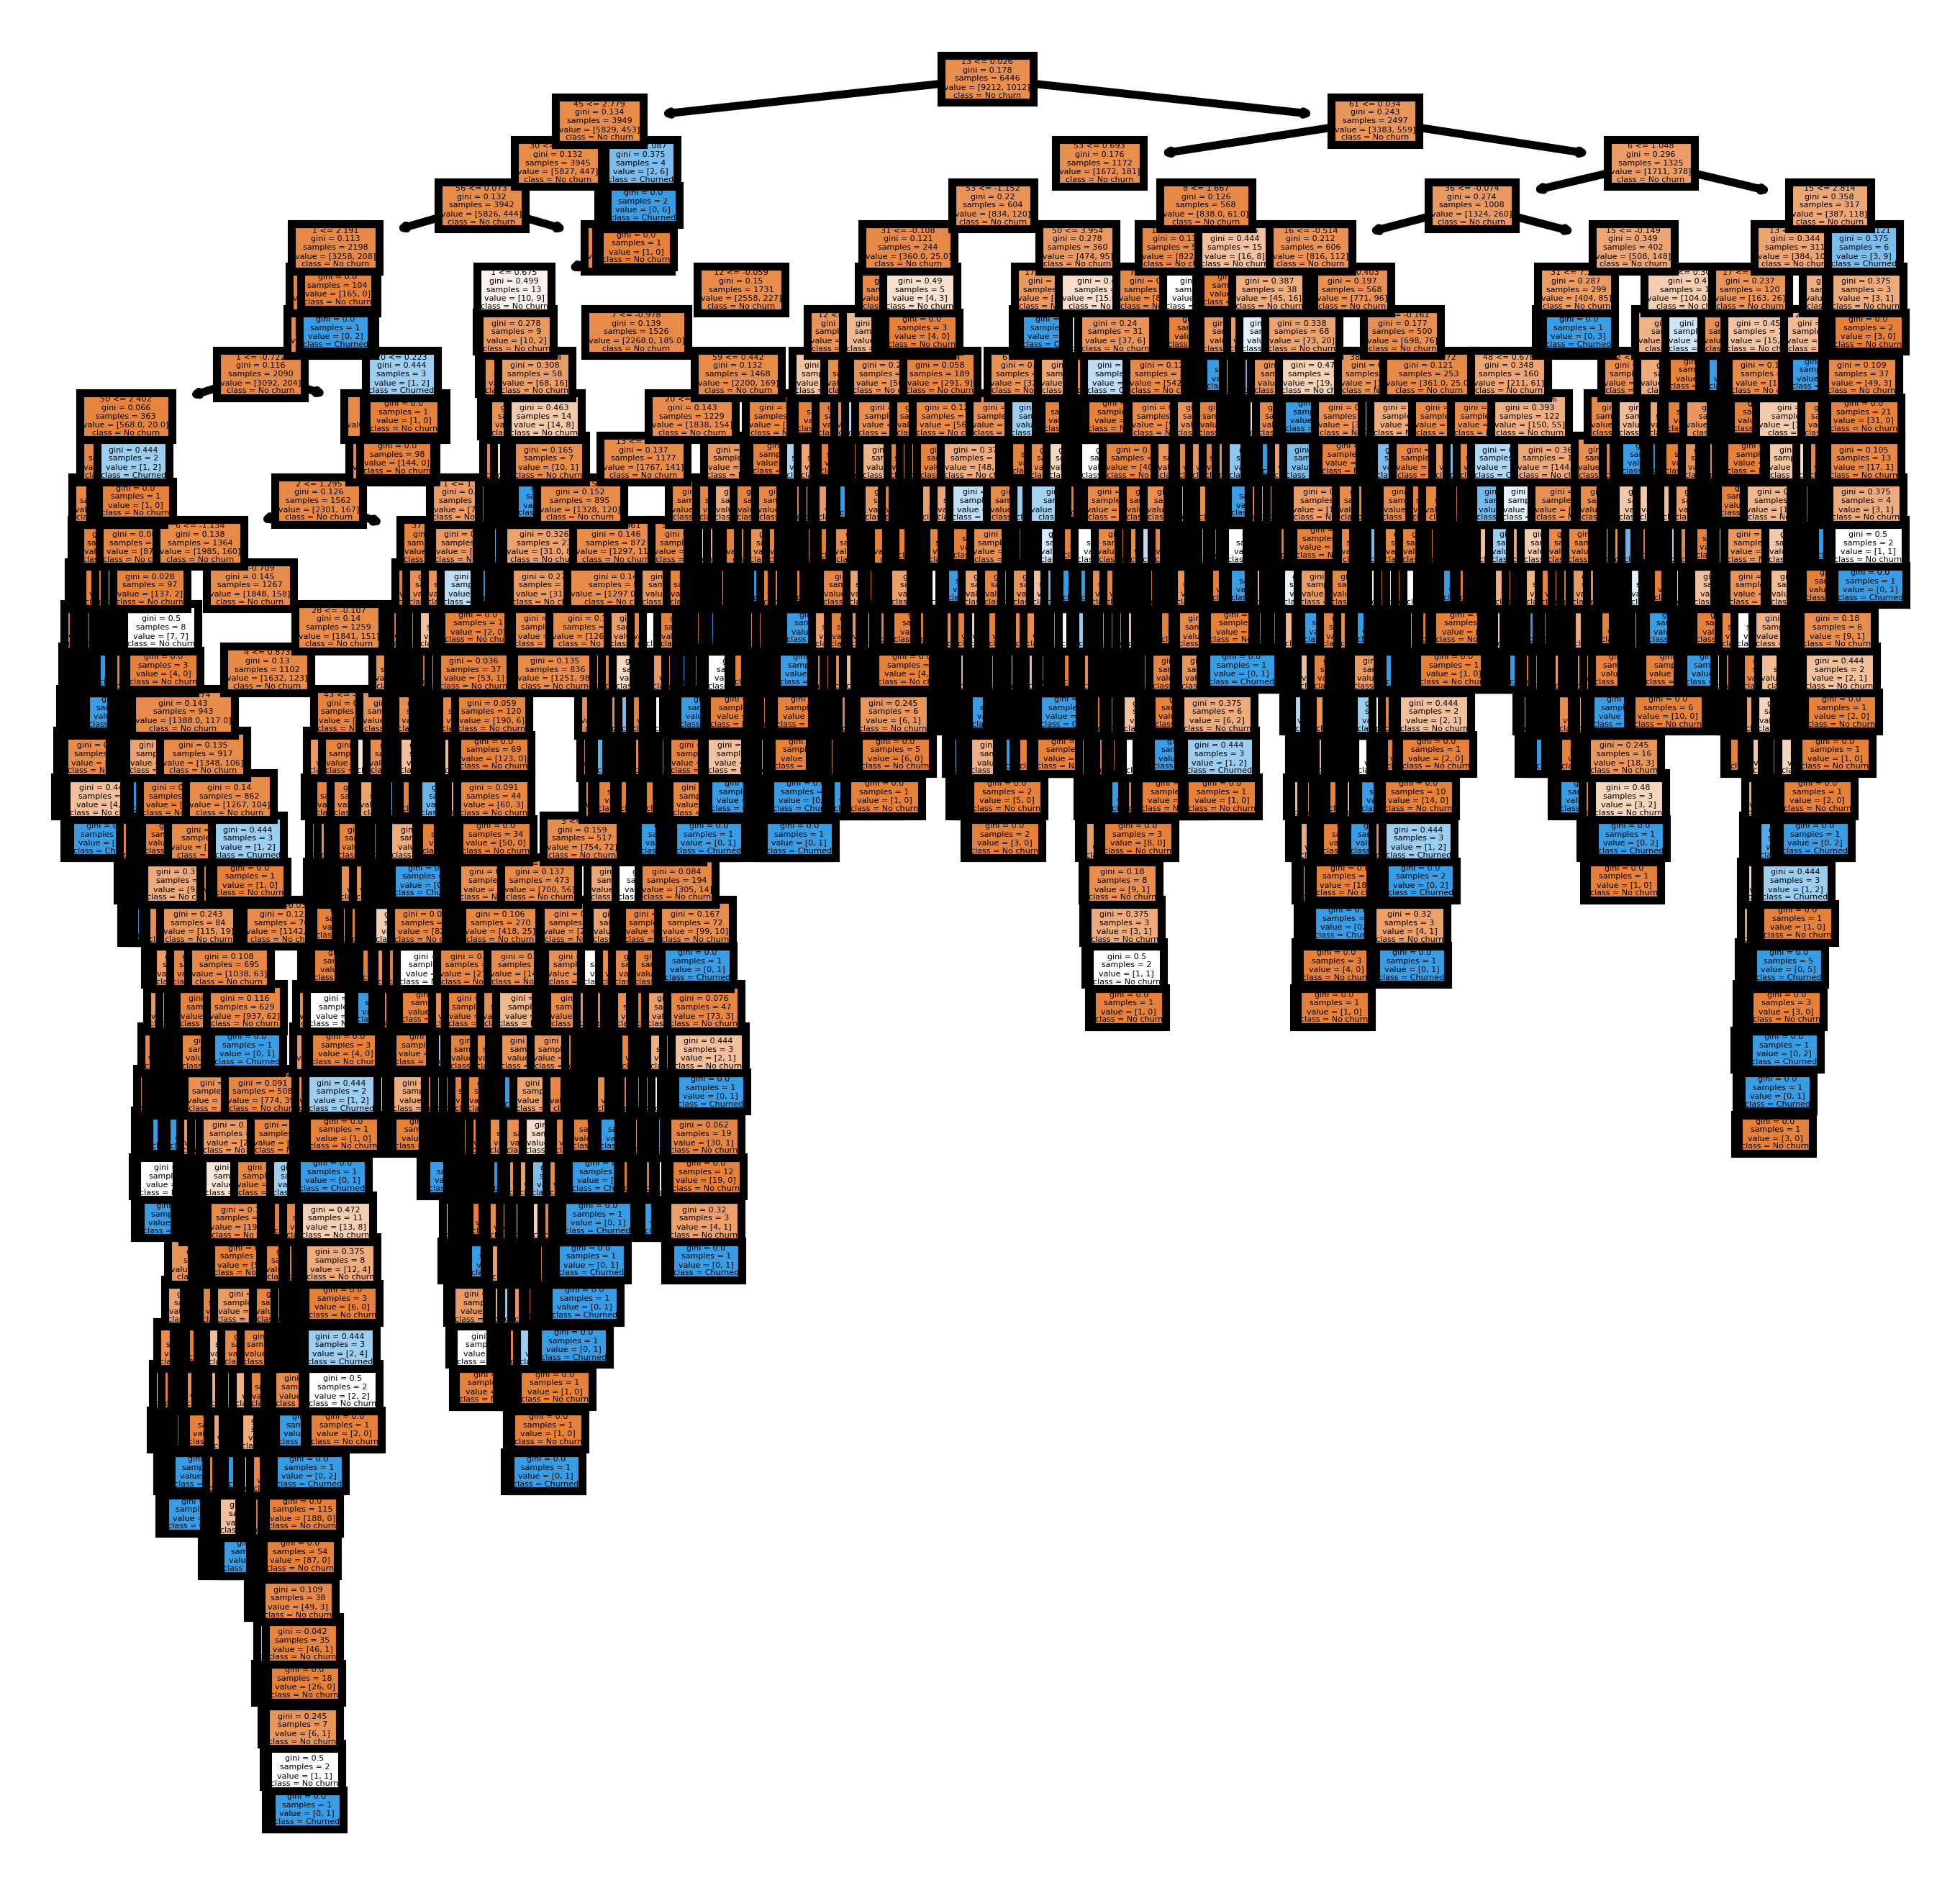

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc_100.estimators_[0],
                feature_names = feature_names,
                class_names={0:'No churn', 1:'Churned'},
                filled = True);

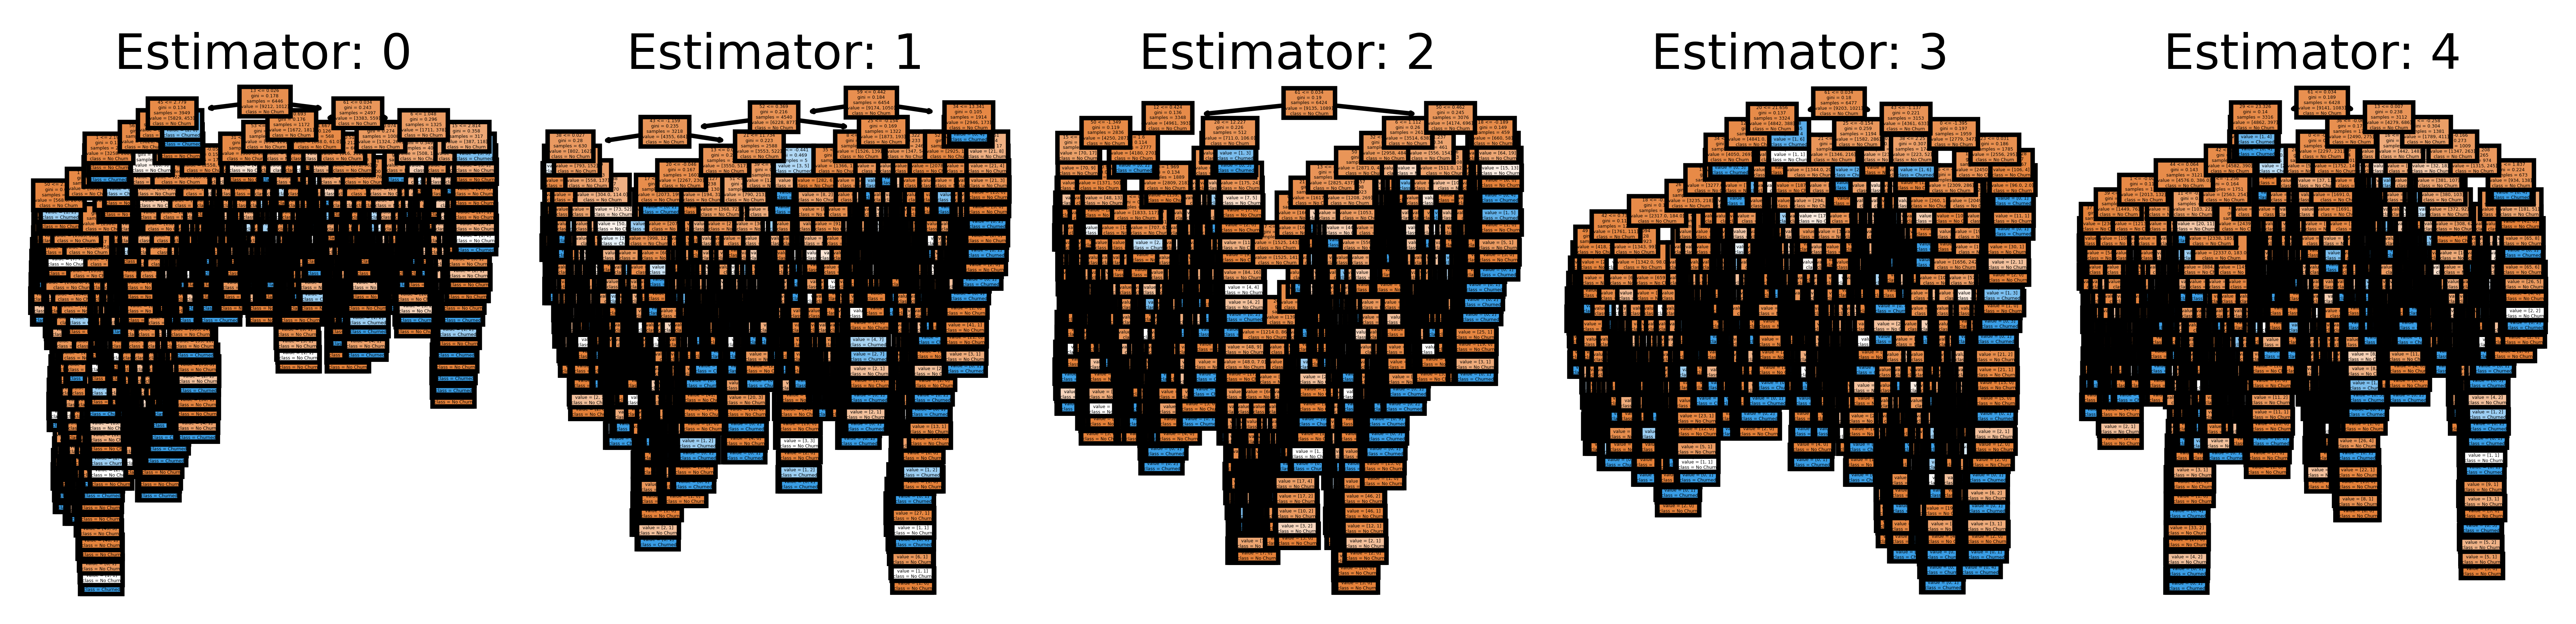

In [49]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rfc_100.estimators_[index],
                  feature_names = feature_names,
                  class_names={0:'No Churn', 1:'Churned'},
                  filled = True,
                  ax = axes[index]);
    axes[index].set_title('Estimator: ' +str(index), fontsize = 11)

In [51]:
y_pred = rfc_100.predict(X_test)


In [53]:
y_proba = rfc_100.predict_proba(X_test)


In [55]:
churn_prob = y_proba[:, 1]  # Only the probability of class "1" (Churned)


In [67]:
results = pd.DataFrame({
    'Customer_ID': X_test.index,         
    'Churn_Predicted': y_pred,
    'Churn_Probability': churn_prob
})


In [69]:
results.to_csv("predicted_churn.csv", index=False)


In [71]:
from IPython.display import FileLink
FileLink('predicted_churn.csv')


C:\Users\soumy\predicted_churn.csv

In [75]:
np.sum(y_pred == 1) #no of customers likely to churn


24

In [87]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churned"]))


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

roc_auc = roc_auc_score(y_test, churn_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[3986    4]
 [ 372   20]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      1.00      0.95      3990
     Churned       0.83      0.05      0.10       392

    accuracy                           0.91      4382
   macro avg       0.87      0.53      0.53      4382
weighted avg       0.91      0.91      0.88      4382


Accuracy:  0.9142
Precision: 0.8333
Recall:    0.0510
F1 Score:  0.0962
ROC-AUC Score: 0.6739
